## Importing Libraries & Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    

In [3]:
## Reading in cleaned data -- dropping the columns with irrelevant targets
df = pd.read_csv('../data/exports/health_landscape_clean.csv').drop(columns=['strokeDeath_rate',
                                                                             'pct_diabetes_13'])

In [4]:
## Takes a dataframe with a "FIPS County" code and translates it into an object
## This is done because the csv saves codes such as 01001 as 1001
def fips_to_obj(df):
    df['FIPS'] = [int(i) for i in df['FIPS'].fillna(0)]
    df['FIPS'] = df['FIPS'].astype('object')
    fips_list = []
    for i in df['FIPS']:
        if len(str(i)) < 5:
            fips_list.append('0' + str(i))
        else:
            fips_list.append(str(i))
    df['FIPS'] = fips_list
    return df

df = fips_to_obj(df)

## Abridged EDA

### Correlations

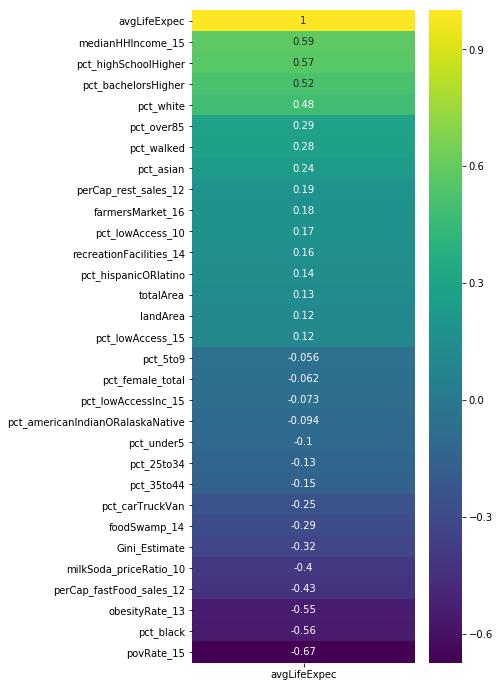

In [5]:
## Examining 15 most positively and negatively correlated features in dataset
plt.figure(figsize=(5,12))
sns.heatmap(df.corr()[['avgLifeExpec']].sort_values(by='avgLifeExpec', ascending=False)\
    .iloc[np.r_[0:16, -15:0]], annot=True, cmap='viridis');

### Scatterplot

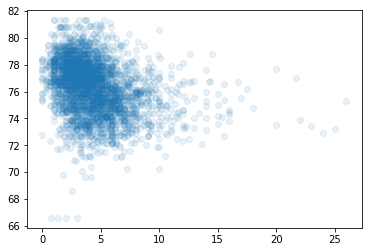

In [5]:
## Examining relationship between food swamps and diabetes
plt.scatter(df['foodSwamp_14'], df['avgLifeExpec'], alpha = .1);

## Simple OLS Model

In [6]:
## Setting feature set and target for OLS model
X = df[['foodSwamp_14','pct_lowAccessInc_15','recreationFacilities_14', 'povRate_15','natAmenityIndex',
        'milkSoda_priceRatio_10', 'pct_black', 'pct_hispanicORlatino','pct_over65','totalArea']]
y = df['avgLifeExpec']

## Setting SKLearn linear regression
lr = LinearRegression()
lr.fit(X, y)
print('Score:',lr.score(X, y))
print('Cross val score:',cross_val_score(lr, X, y, cv=5, scoring='explained_variance').mean())

Score: 0.5925433347660372
Cross val score: 0.5537257892529285


In [7]:
## Setting OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           avgLifeExpec   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     445.1
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        14:41:12   Log-Likelihood:                -5094.9
No. Observations:                3072   AIC:                         1.021e+04
Df Residuals:                    3061   BIC:                         1.028e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      81.3878      0.217    375.211      0.000      80.962      81.813
foodSwamp_14               -0.0945      0.009     -9.969      0.000      -0.113      -0.076
pct_lowAccessInc_15        -0.0013      0.003     -0.411      0.681      -0.007       0.005
recreationFacilities_14     0.0057      0.001      7.758      0.000       0.004       0.007
povRate_15                 -0.1595      0.004    -35.879      0.000      -0.168      -0.151
natAmenityIndex            -0.0272      0.026     -1.052      0.293      -0.078       0.023
milkSoda_priceRatio_10     -2.5722      0.200    -12.885      0.000      -2.964      -2.181
pct_black                  -2.2478      0.209    -10.744      0.000      -2.658      -1.838
pct_hispanicORlatino        2.7783      0.199     13.962      0.000       2.388       3.168
pct_over65                  2.7368      0.592      4.621      0.000       1.575       3.898
totalArea               -1.872e-05   2.01e-05     -0.933      0.351   -5.81e-05    2.06e-05
==============================================================================
Omnibus:                      126.251   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              374.155
Skew:                           0.108   Prob(JB):                     5.66e-82
Kurtosis:                       4.696   Cond. No.                     4.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
## Examining for any multicollinearity
pd.Series([variance_inflation_factor(X.values, i) 
            for i in range(X.shape[1])], 
            index=X.columns)

const                      89.200261
foodSwamp_14                1.189776
pct_lowAccessInc_15         1.137420
recreationFacilities_14     1.166298
povRate_15                  1.540199
natAmenityIndex             1.376809
milkSoda_priceRatio_10      1.402644
pct_black                   1.750550
pct_hispanicORlatino        1.405352
pct_over65                  1.325864
totalArea                   1.356419
dtype: float64